In [33]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.ensemble as ens
import utils

In [70]:
import dataGenerator
import utils as u
import featureSelectionMethods as fs
import metricEvaluator as mev
importlib.reload(fs)
importlib.reload(u)
importlib.reload(dataGenerator)

C:\Users\18pep\Documents\Sem_I\DVaE\Project\utils.py:26: SyntaxWarning: invalid escape sequence '\i'
  print("generating {}".format(f))


<module 'dataGenerator' from 'C:\\Users\\18pep\\Documents\\Sem_I\\DVaE\\Project\\dataGenerator.py'>

In [ ]:
def find_bucket(buckets,item):
    for key in buckets.keys():
        if item <=buckets[key]:
            return key

In [ ]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
list(buckets.keys())

In [ ]:
def task_1_B(ths,n_rel,method,generator,y_true):
    counters={"relevant":0,"irrelevant":0,"correlated":0,"redundant":0}
    metrics=["Bolon_Canedo","accuracy","F1"]
    
    metrics_val={}
    for metric in metrics:
        metrics_val[metric]=[]
    its=[]    
    for i in range(100):
        X,y=generator()
        all=np.arange(X.shape[1])
        model=fs.featureSelector(n=n_rel)
        y_pred=getattr(model,method)(X,y)
        
        mete=mev.metricEvaluator(y_pred,y_true,all)
        for metric in metrics:
            val=getattr(mete,metric)()
            metrics_val[metric].append(val)
        
        for j in y_pred:
            bucket=find_bucket(ths,j)
            counters[bucket]+=1
        its.append(i)
    plt.figure(figsize=(16,8))
    plt.xlabel("Iterations")
    plt.ylabel("metrics")
    plt.title(f"Feature Selection Method: {method} {n_rel} features")
    for metric in metrics:
        plt.plot(metrics_val[metric],label=metric)
    plt.legend()
    plt.savefig(f"plots\\{method}_{n_rel}_features.png")
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.xlabel("types")
    plt.ylabel("count")
    plt.title(f"Types of features selected: {method} {n_rel} features")
    for key in counters.keys():
        plt.bar(key,counters[key],label=key)
    plt.savefig(f"plots\\{method}_{n_rel}_types.png")
    plt.show()
    
            
        

In [ ]:
buckets={"relevant":4,"irrelevant":9,"correlated":14,"redundant":19}
y_true=np.arange(5)
methods=["ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper"]
for method in methods:    
    task_1_B(buckets,5,method,u.direct_build_20,y_true)


In [ ]:
buckets={"relevant":9,"irrelevant":19,"correlated":29,"redundant":39}
y_true=np.arange(10)
methods=["ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper"]
for method in methods:    
    task_1_B(buckets,10,method,u.direct_build_40,y_true)


In [ ]:
u.generate_frames("plots")

In [67]:
import featureExtractor as fe
import sklearn.metrics as metrics
import sklearn.model_selection as ms

In [99]:
def cross_validate_models(fs_method,rel):
    metrics_names=["accuracy","F1","recall","precision"]
    funs={"accuracy":metrics.accuracy_score,"F1":metrics.f1_score
        ,"recall":metrics.recall_score,"precision":metrics.precision_score}
    means={}
    for metric in metrics_names:
        means[metric+"_random_forest"]=[]
        means[metric+"_SVM"]=[]
        
    idx=[]
    for i in range(30):
        X,y=u.direct_build_32()
        ext=fe.featureExtractor(X,y,rel)
        it_rf_m={}
        it_svm_m={}
        for metric in metrics_names:
            it_rf_m[metric+"_random_forest"]=[]
            it_svm_m[metric+"_SVM"]=[]
        X,y=getattr(ext, fs_method)()
        folder=ms.KFold(n_splits=10)
        for k,(train,test) in enumerate(folder.split(X)):
            X_train=X[train]
            X_test=X[test]
            y_train=y[train]
            y_test=y[test]
            svm_pred=svm.SVC(kernel='linear').fit(X_train,y_train).predict(X_test)
            rf_pred=ens.RandomForestClassifier().fit(X_train,y_train).predict(X_test)
            
            for metric in metrics_names:
                it_rf_m[metric+"_random_forest"]+=[funs[metric](y_test,rf_pred)]
                it_svm_m[metric+"_SVM"]+=[funs[metric](y_test,svm_pred)]
                
                
        for metric in metrics_names:
            means[metric+"_random_forest"]+=[np.mean(it_rf_m[metric+"_random_forest"])]
            means[metric+"_SVM"]+=[np.mean(it_svm_m[metric+"_SVM"])]
            
        idx.append(i)
    
    for metric in metrics_names:
        plt.figure(figsize=(16,8))
        plt.plot(idx,means[metric+"_random_forest"] ,label=metric+"_random_forest")
        plt.plot(idx,means[metric+"_SVM"],label=metric+"_SVM")
        plt.legend()
        plt.ylabel("measure")
        plt.xlabel("iterations")
        plt.title(f"model evaluation with {fs_method} features selection")
        plt.savefig(f"models\\{fs_method}_metric_{metric}.png")
        plt.show()
        
    

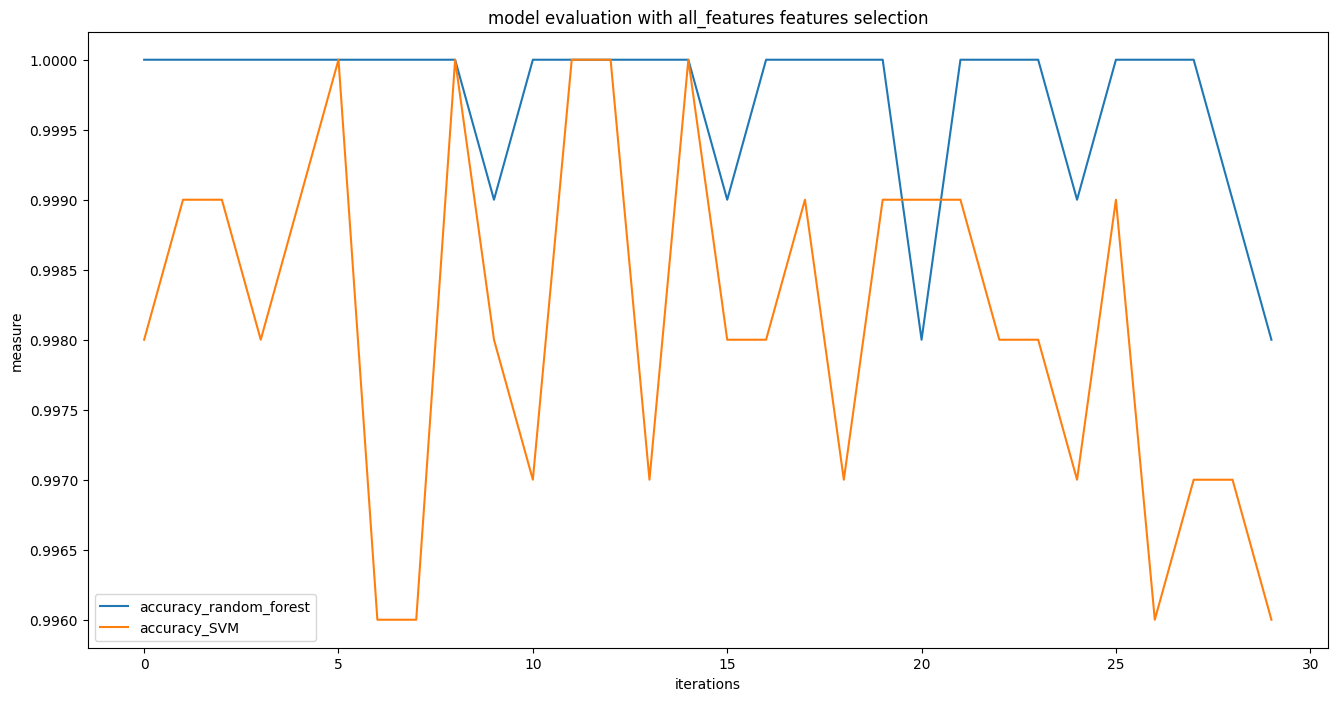

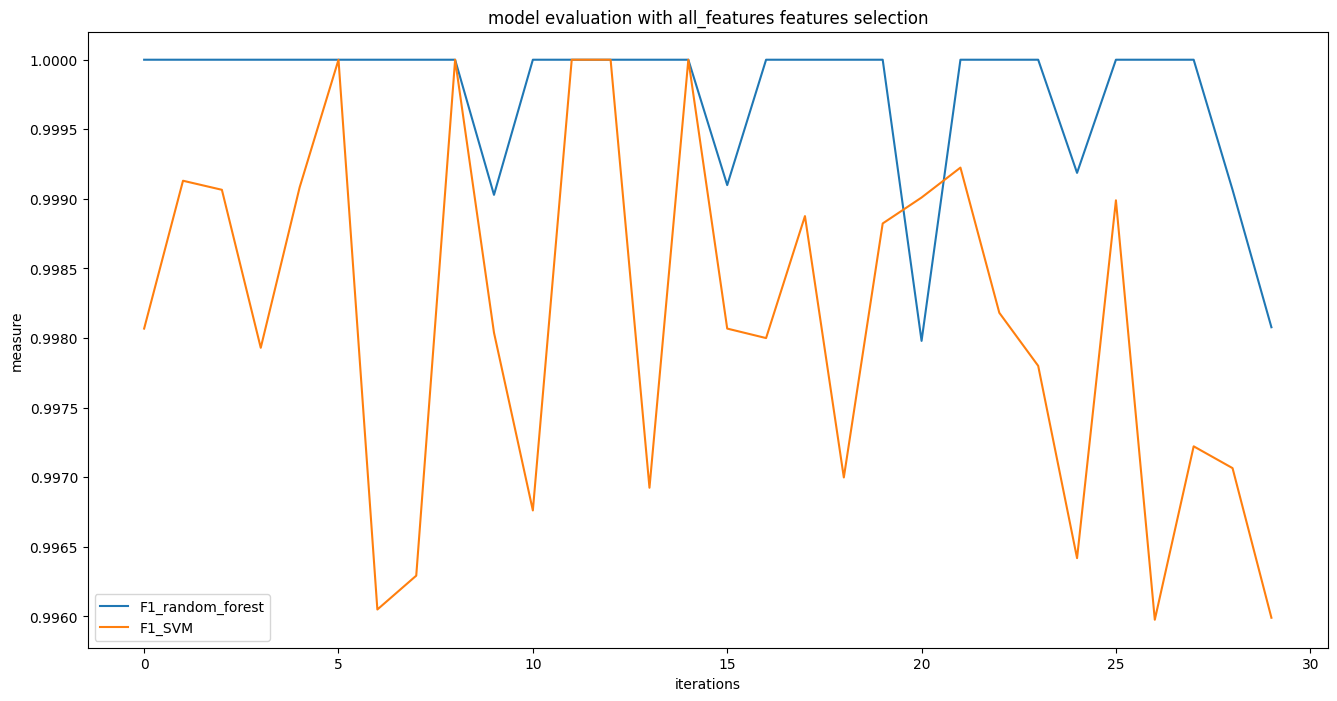

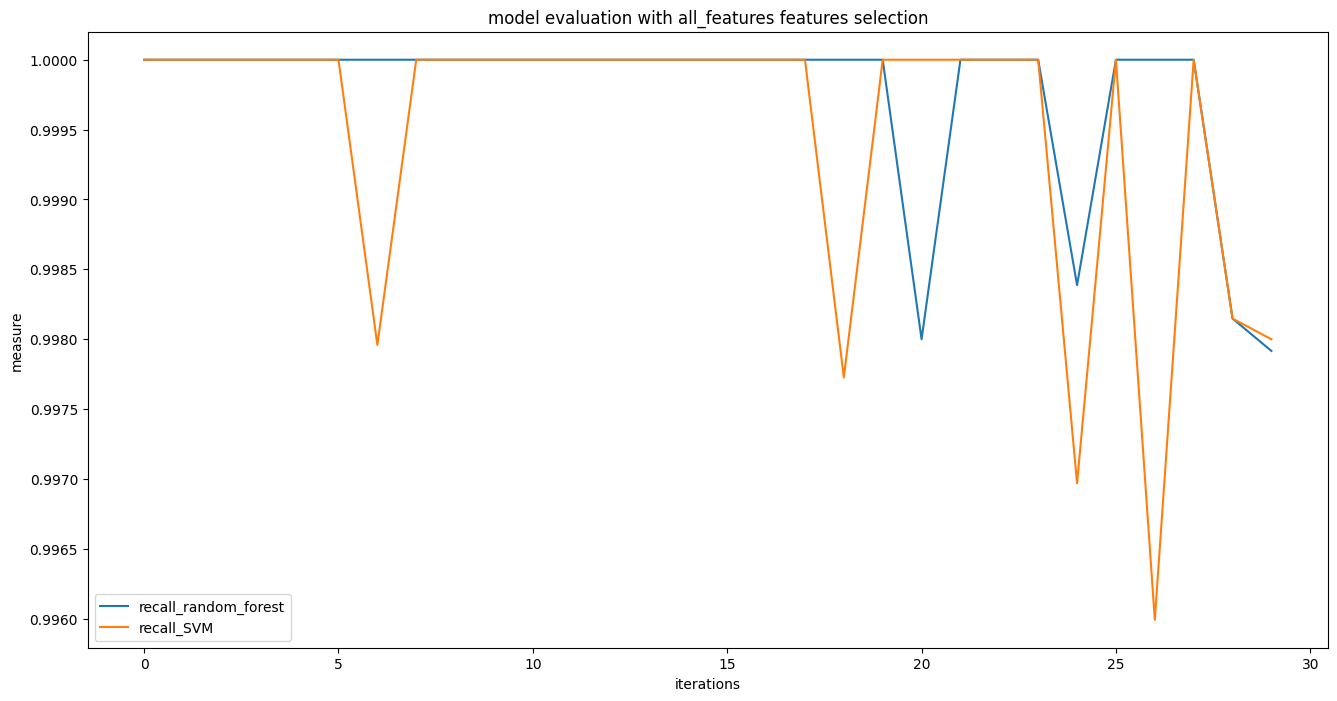

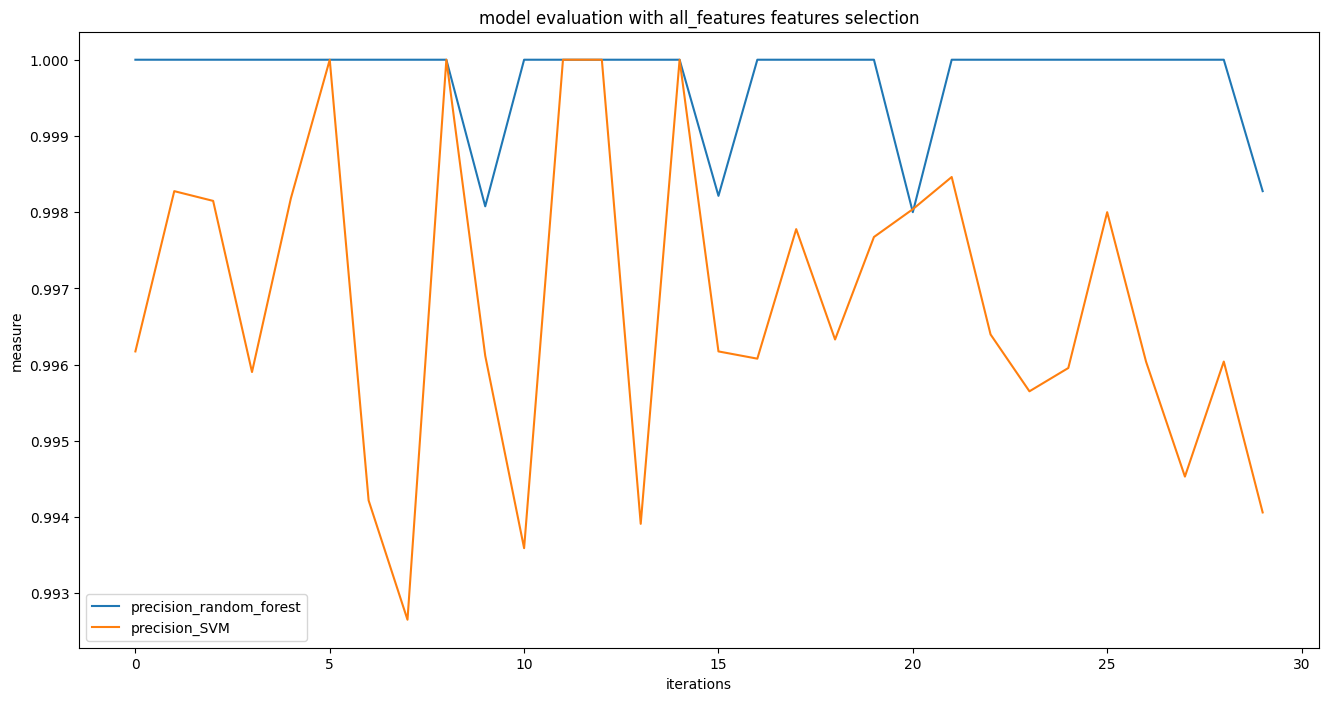

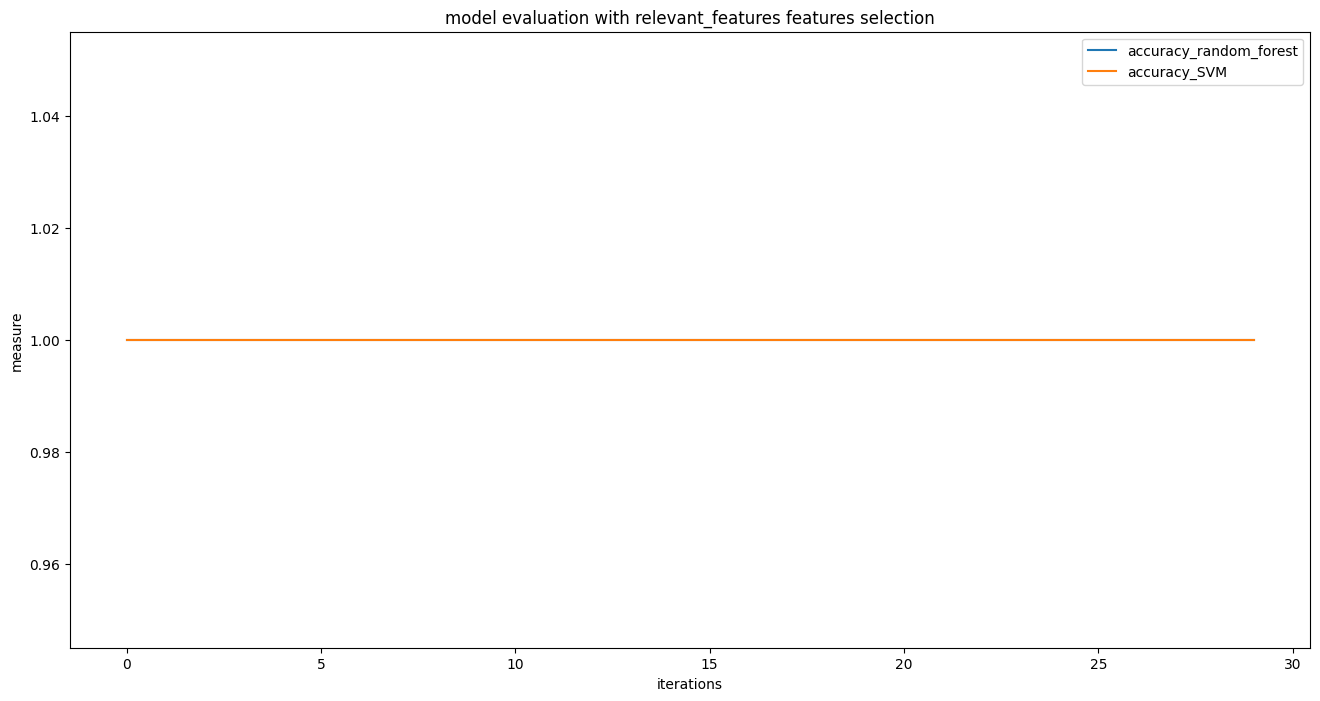

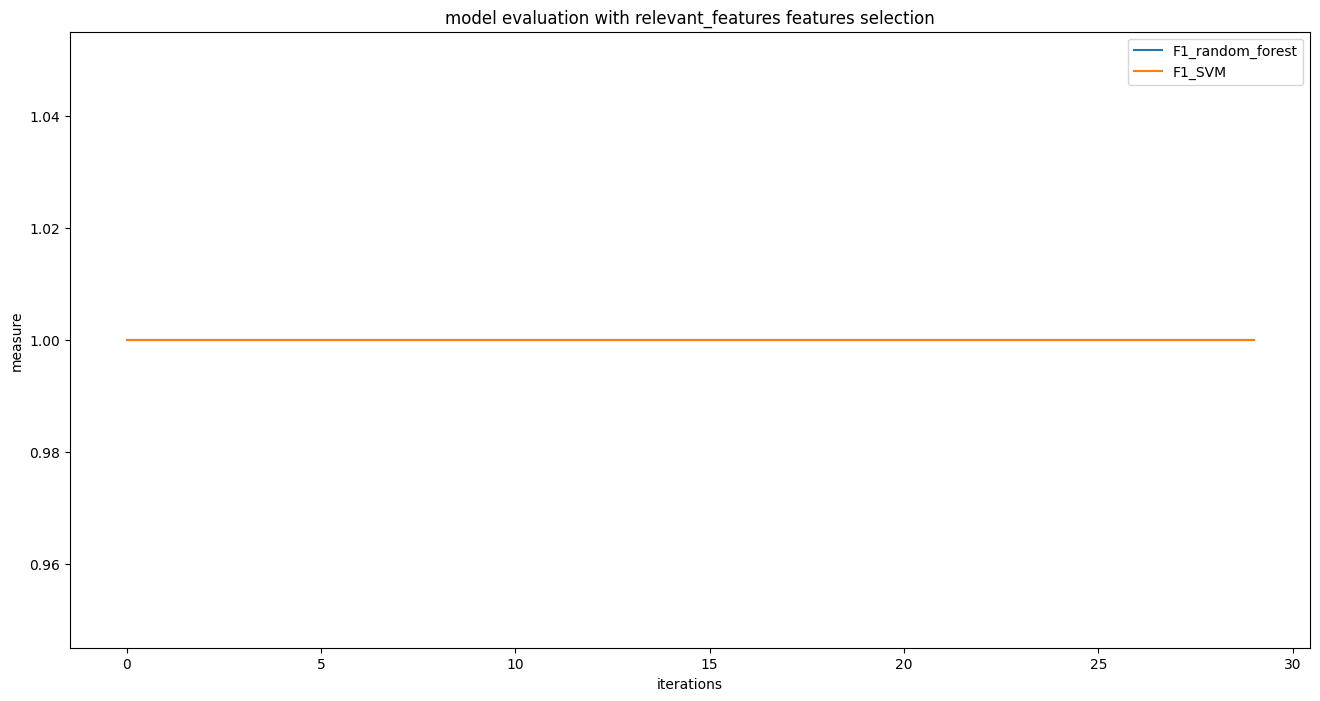

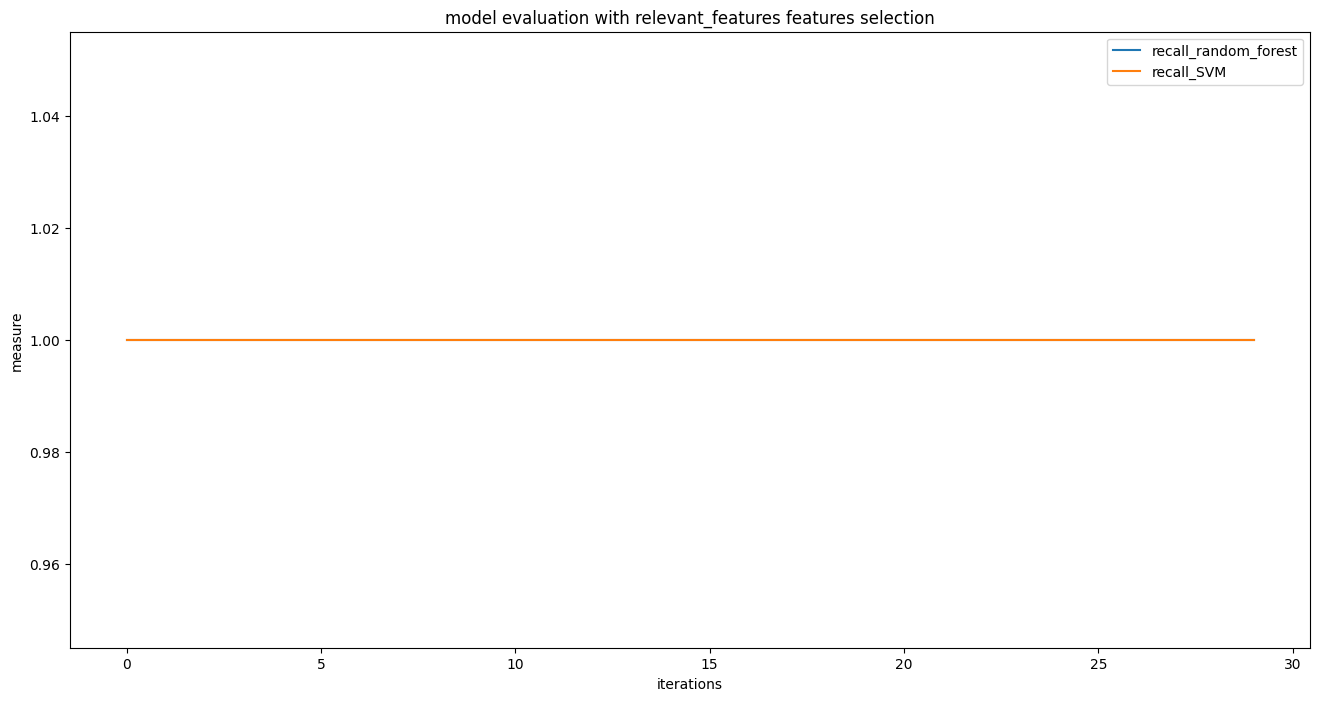

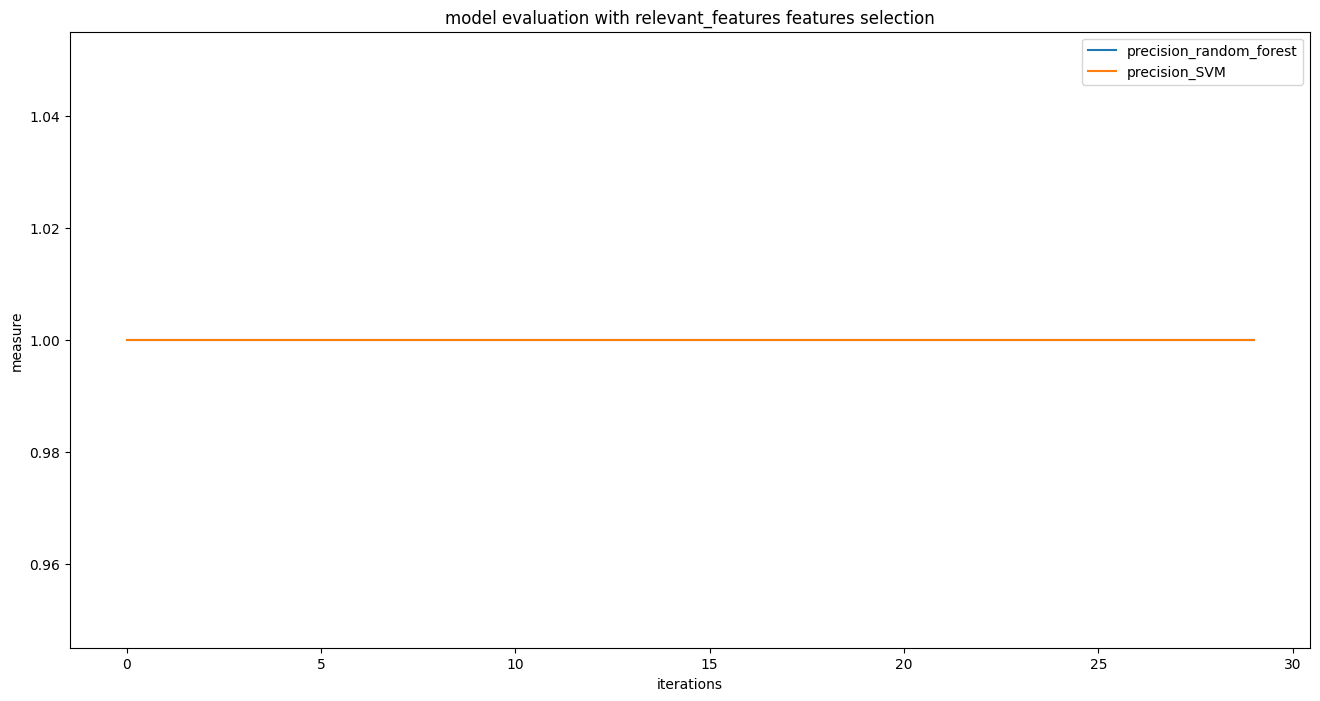

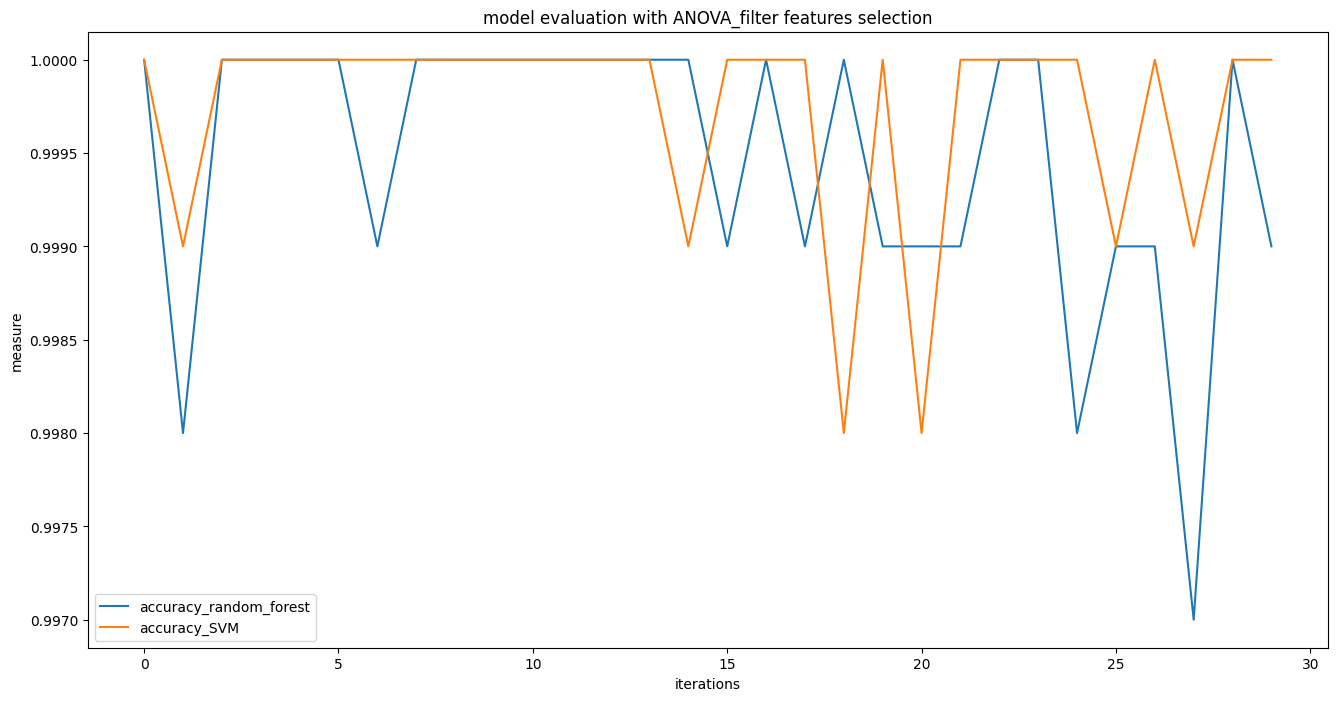

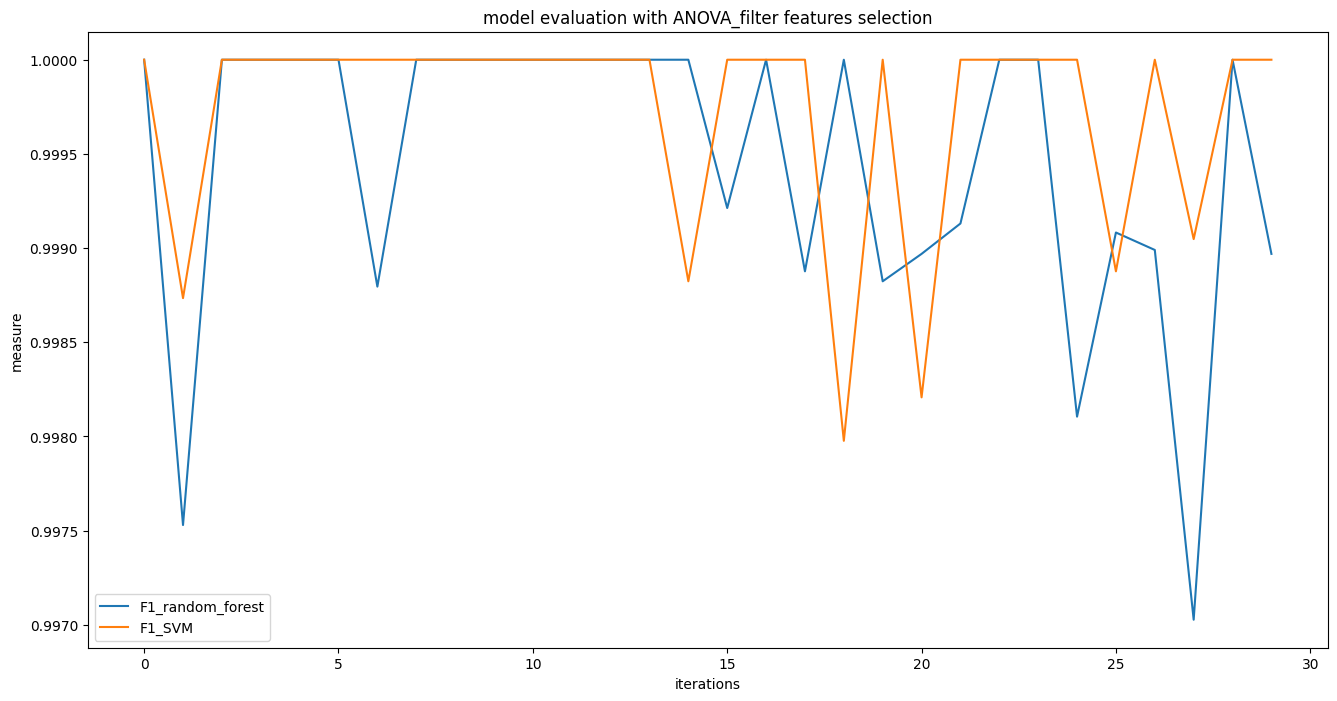

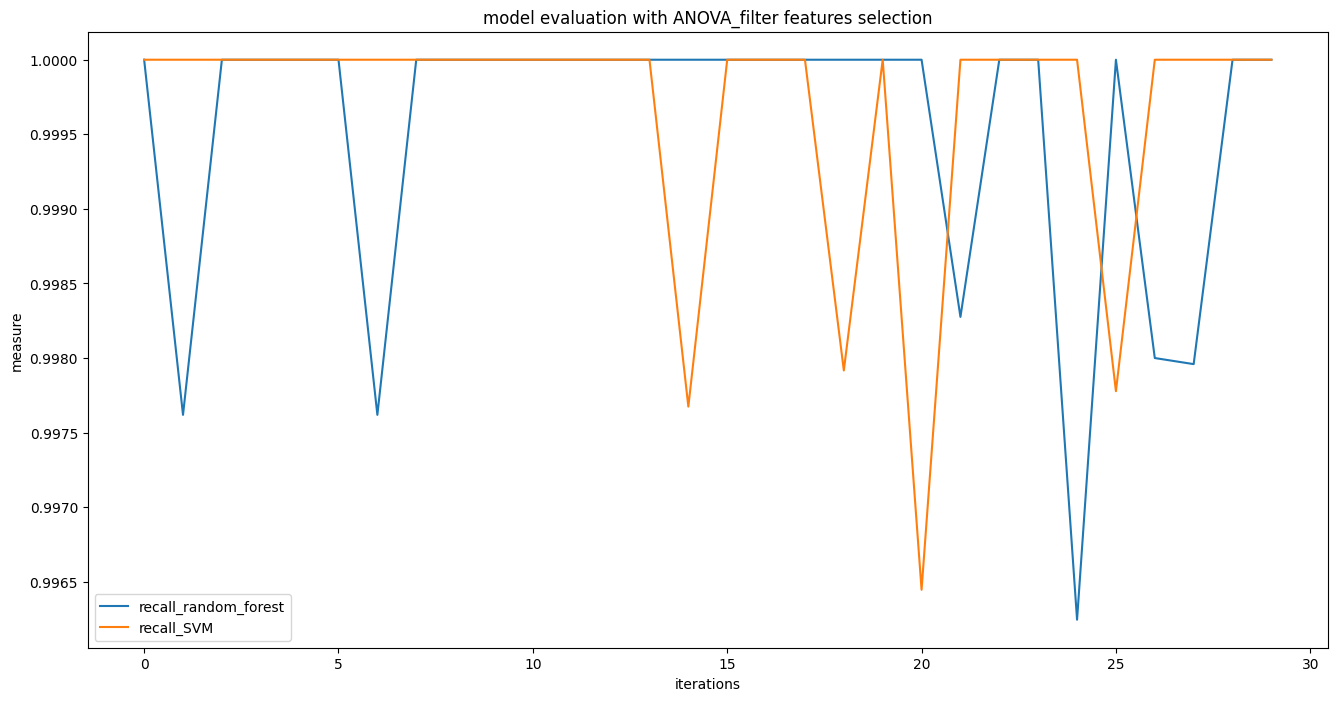

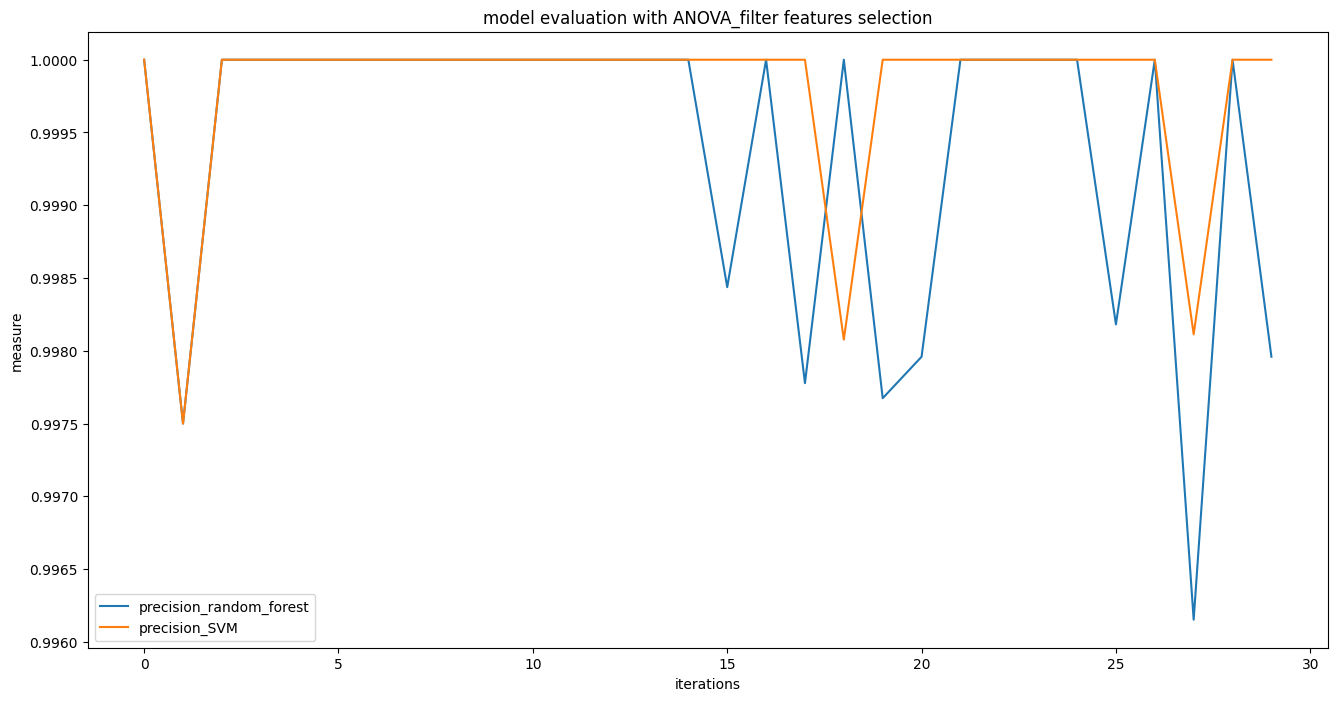

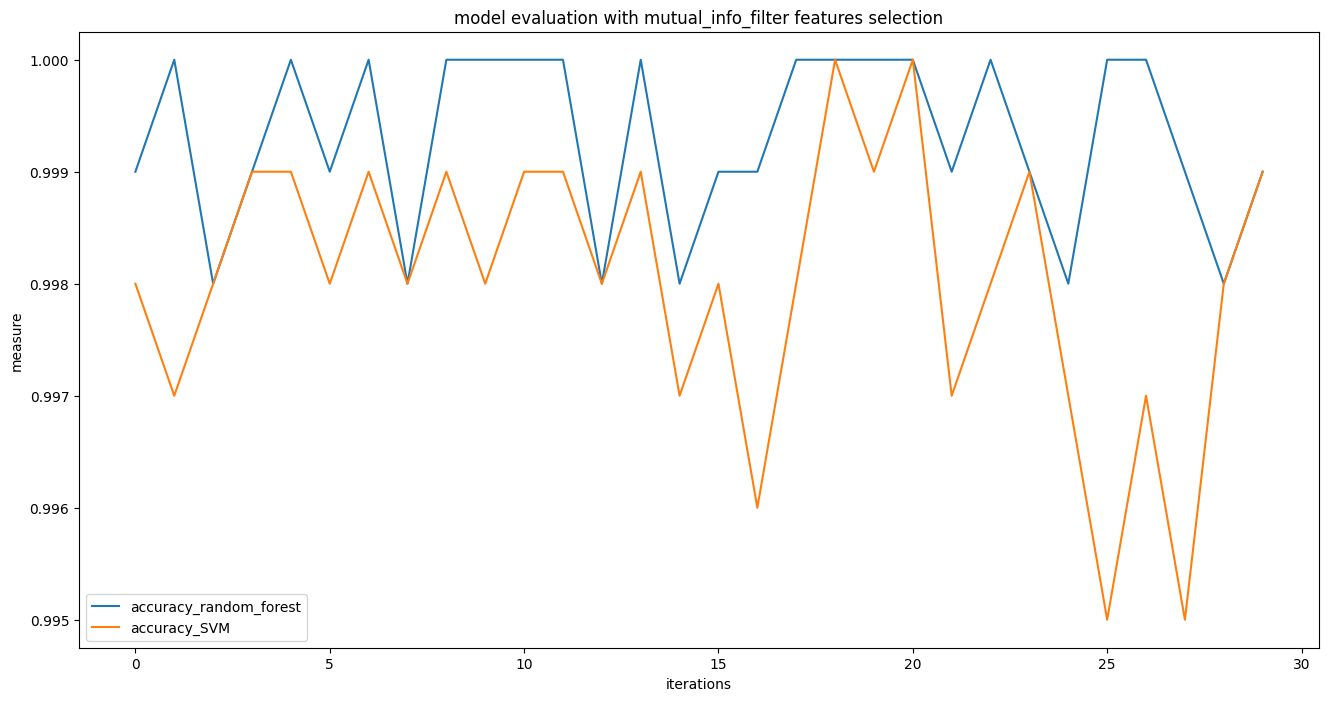

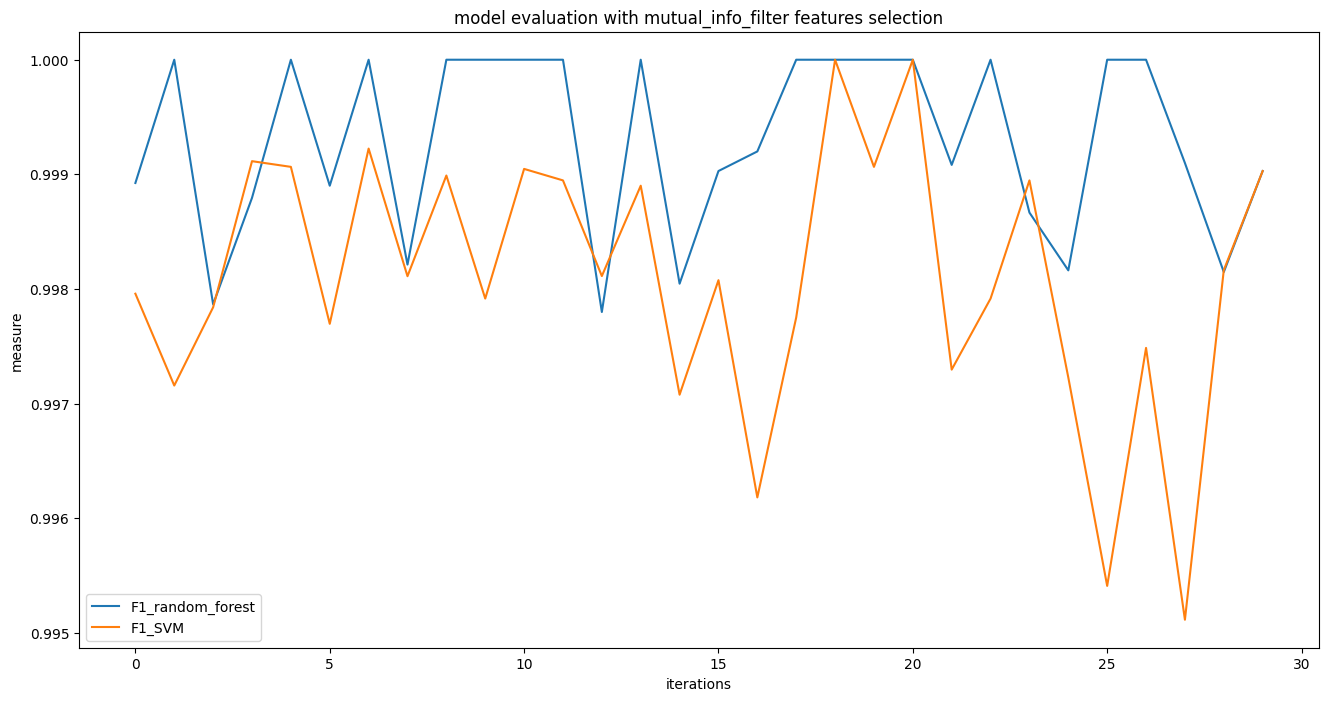

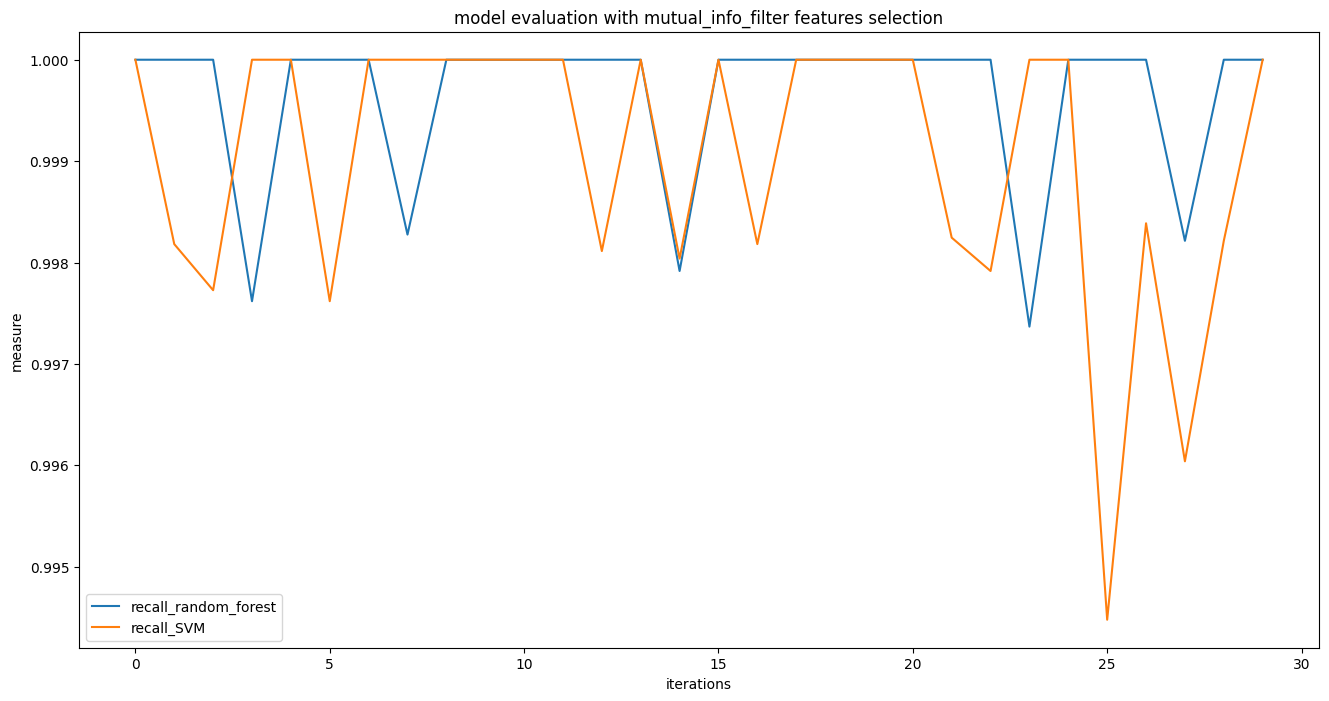

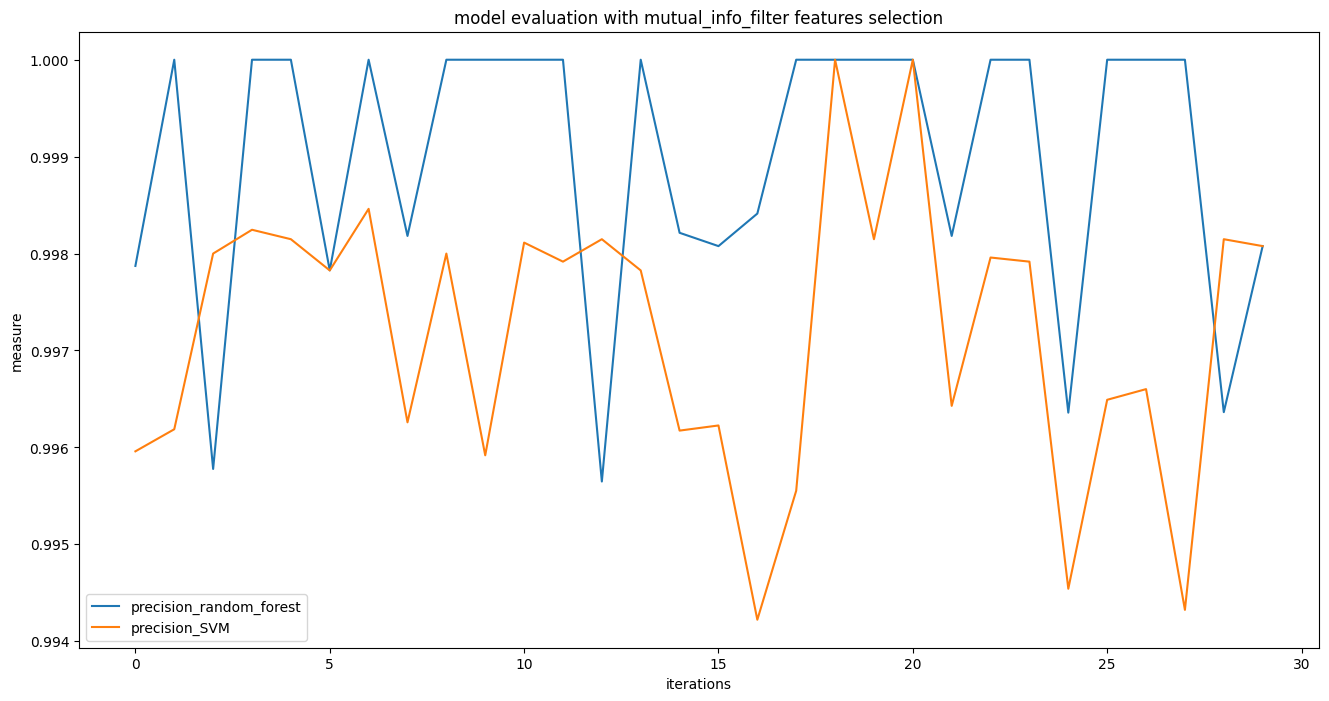

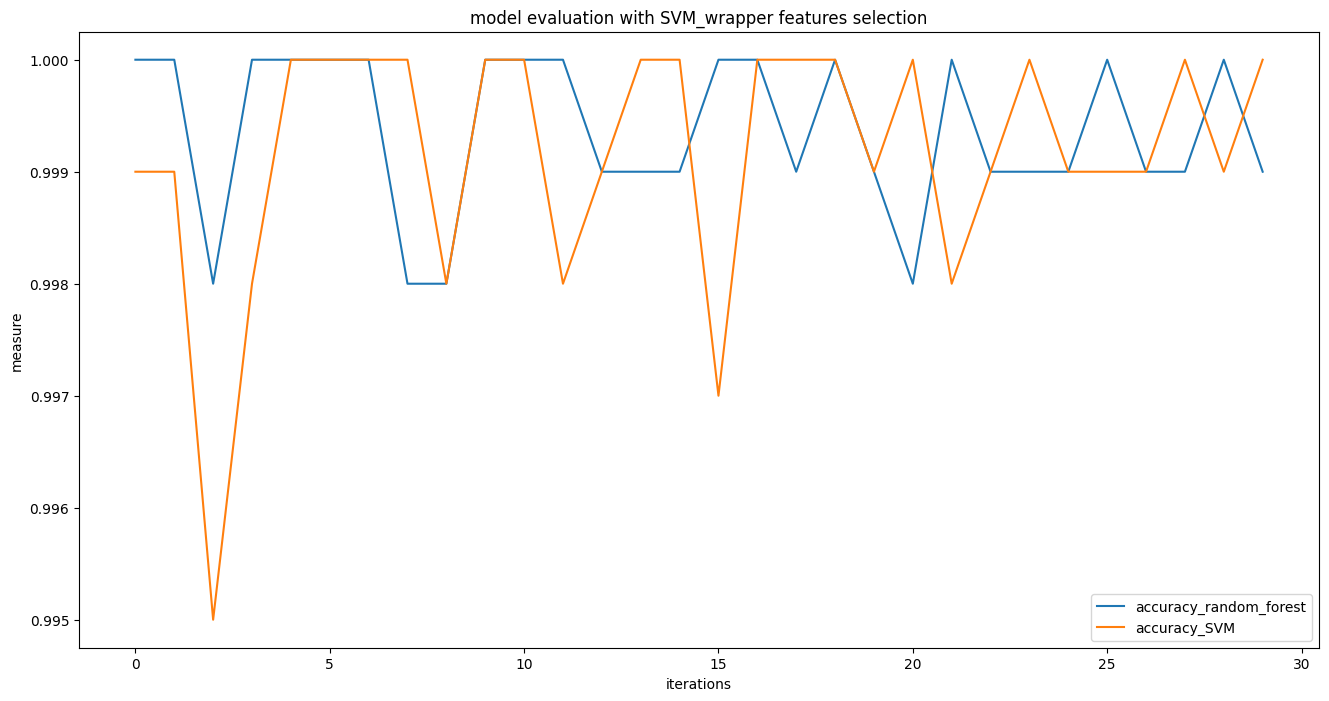

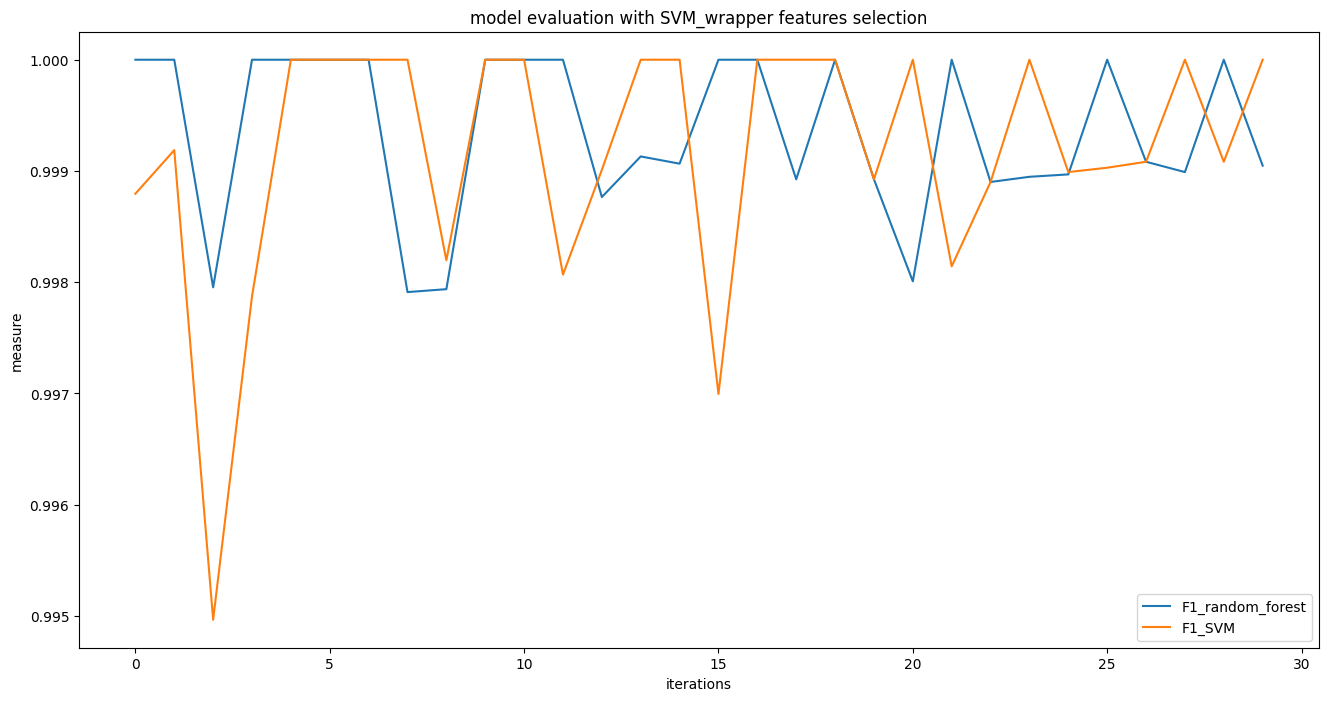

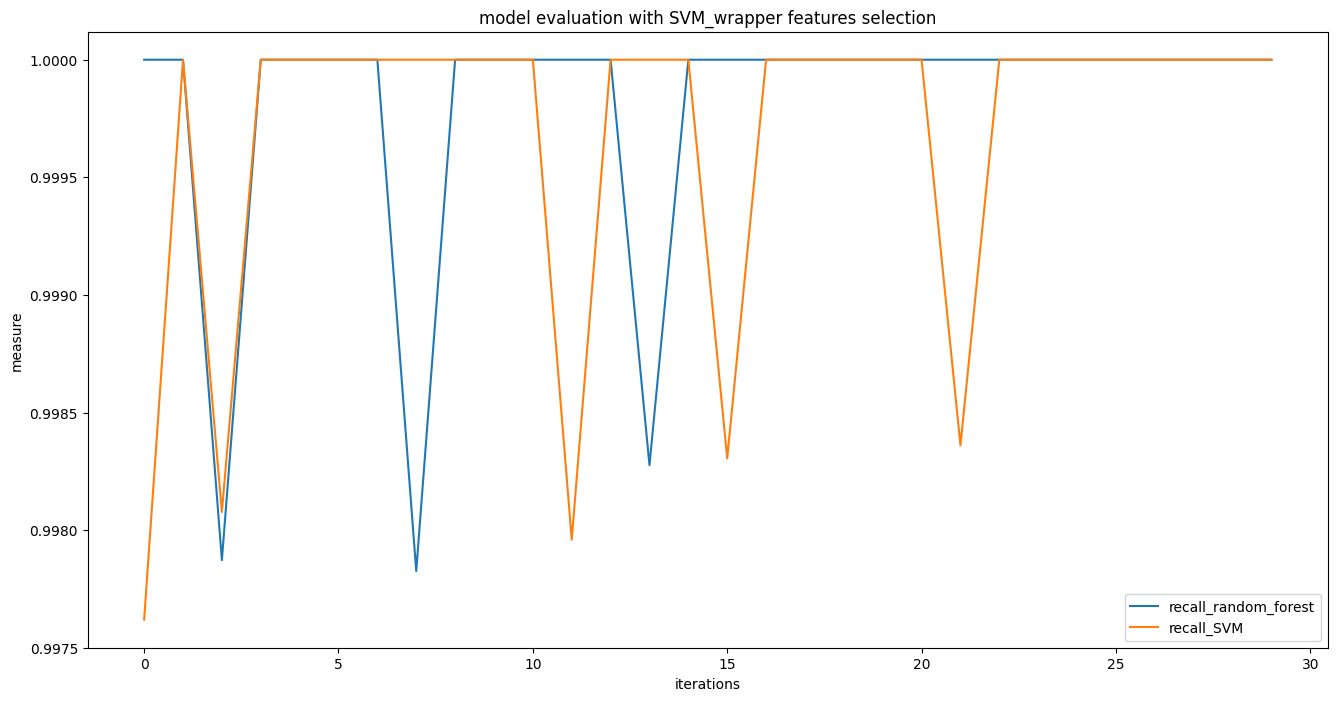

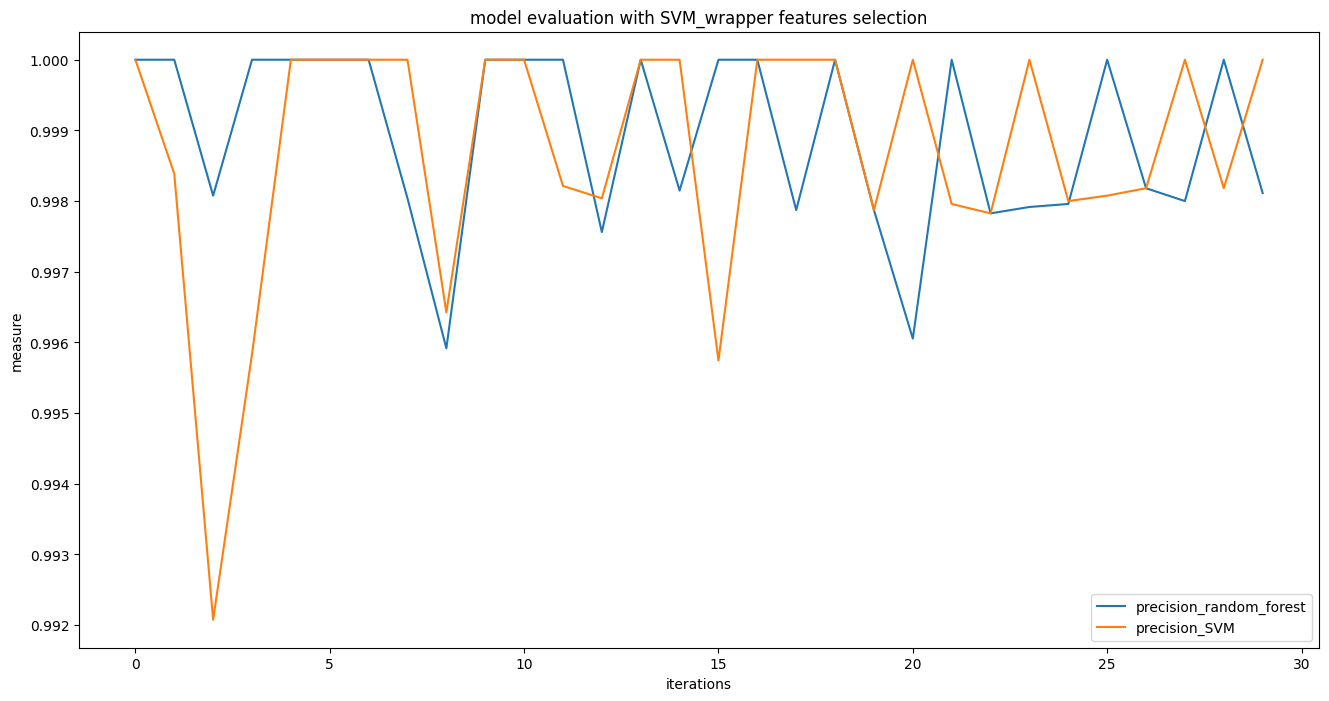

C:\Users\18pep\Documents\Sem_I\AML\Projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\18pep\Documents\Sem_I\AML\Projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

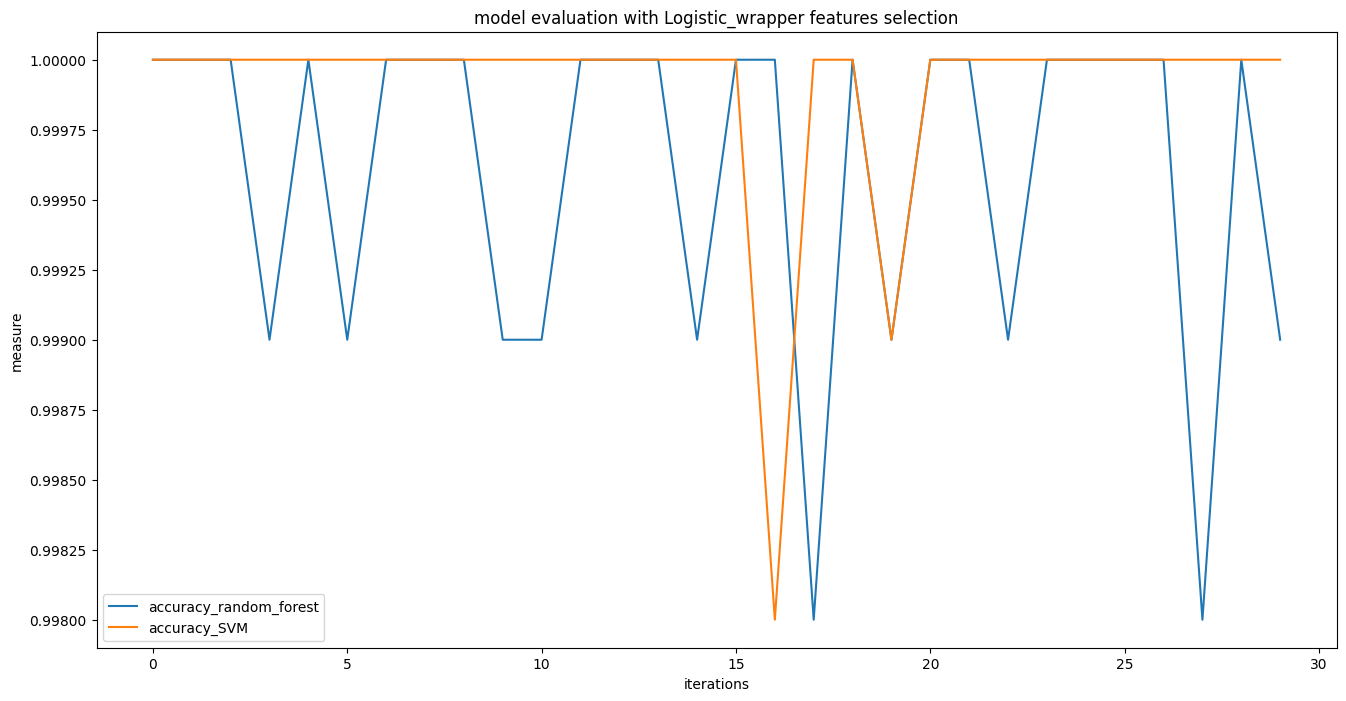

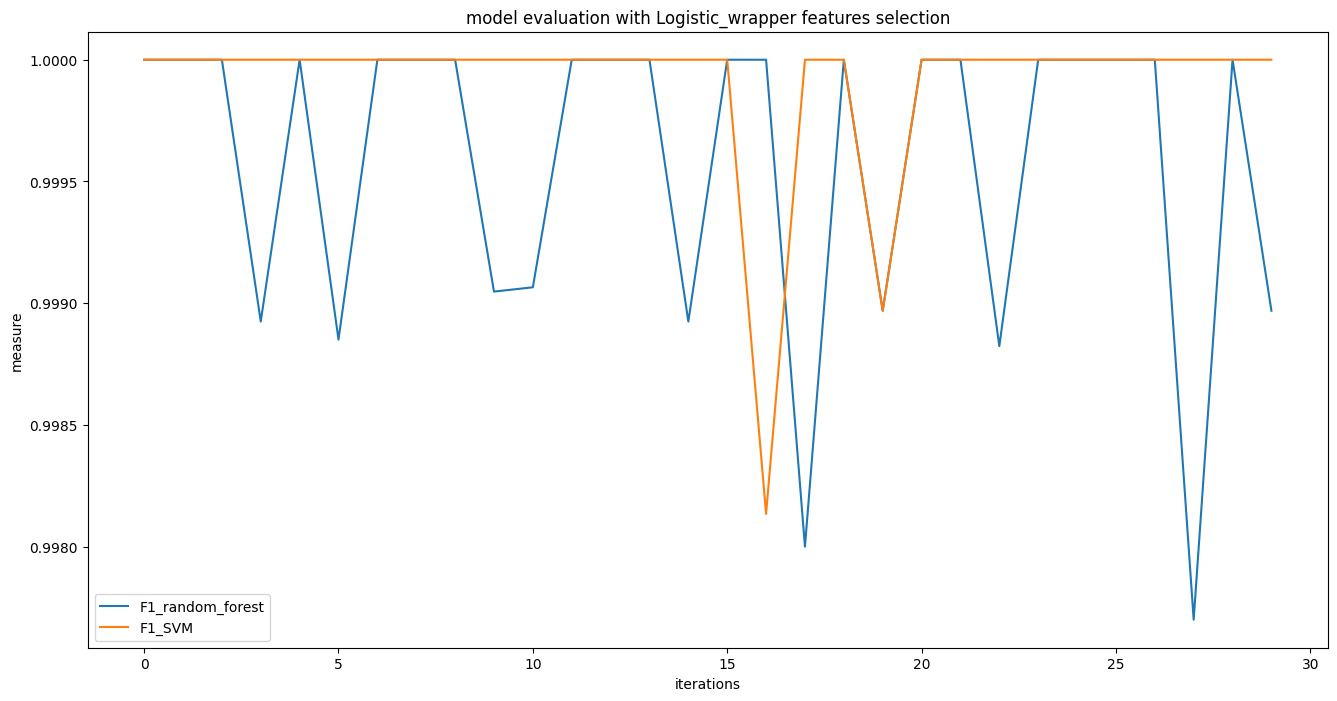

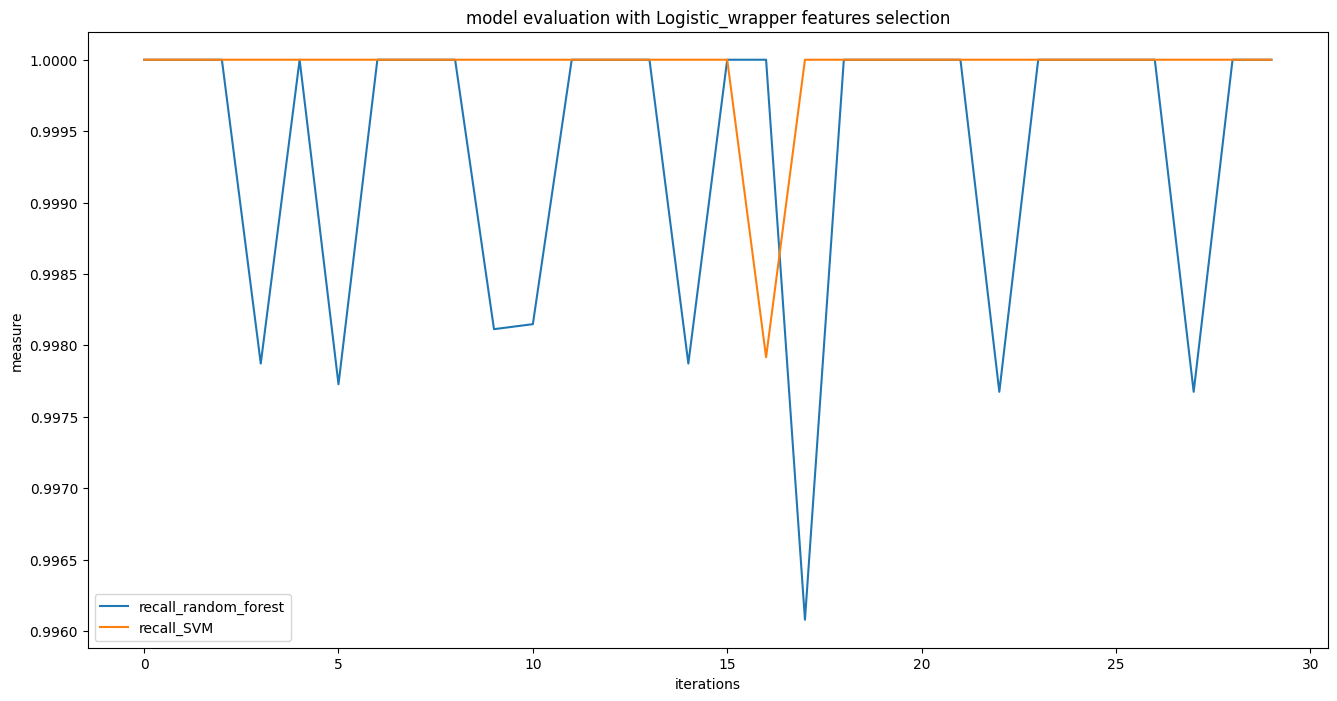

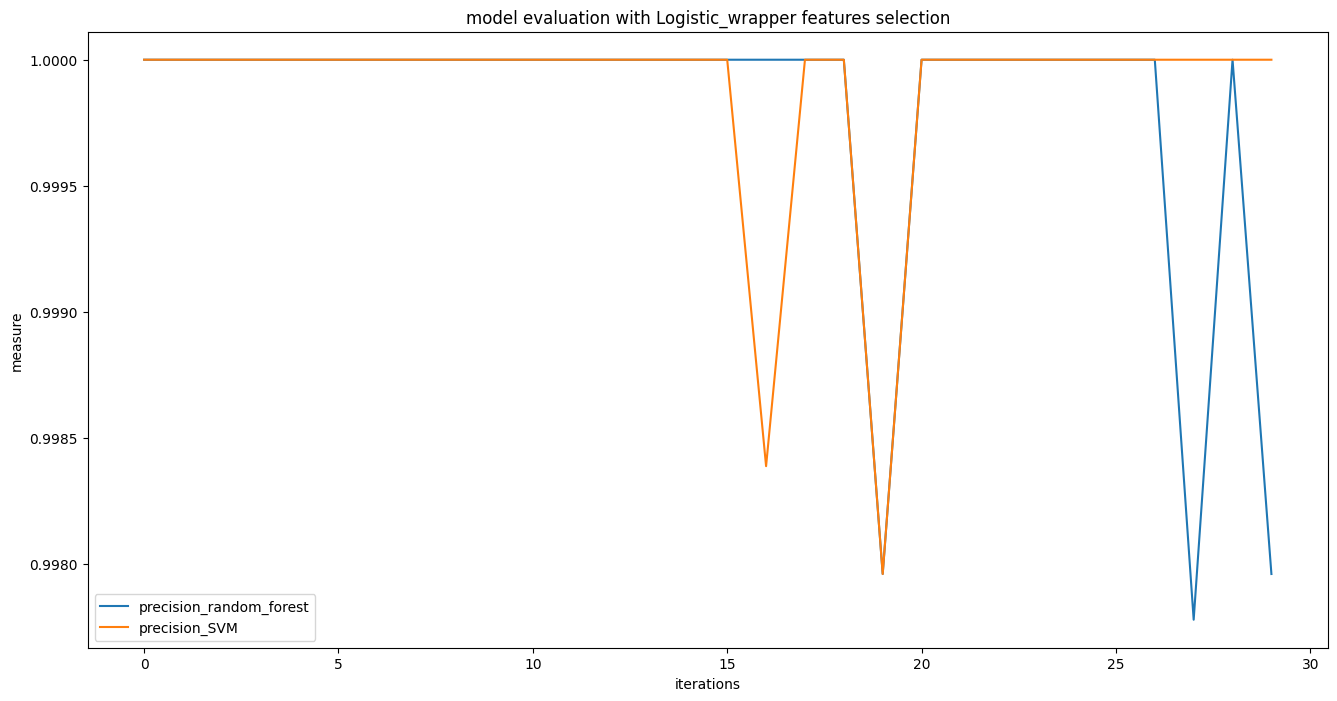

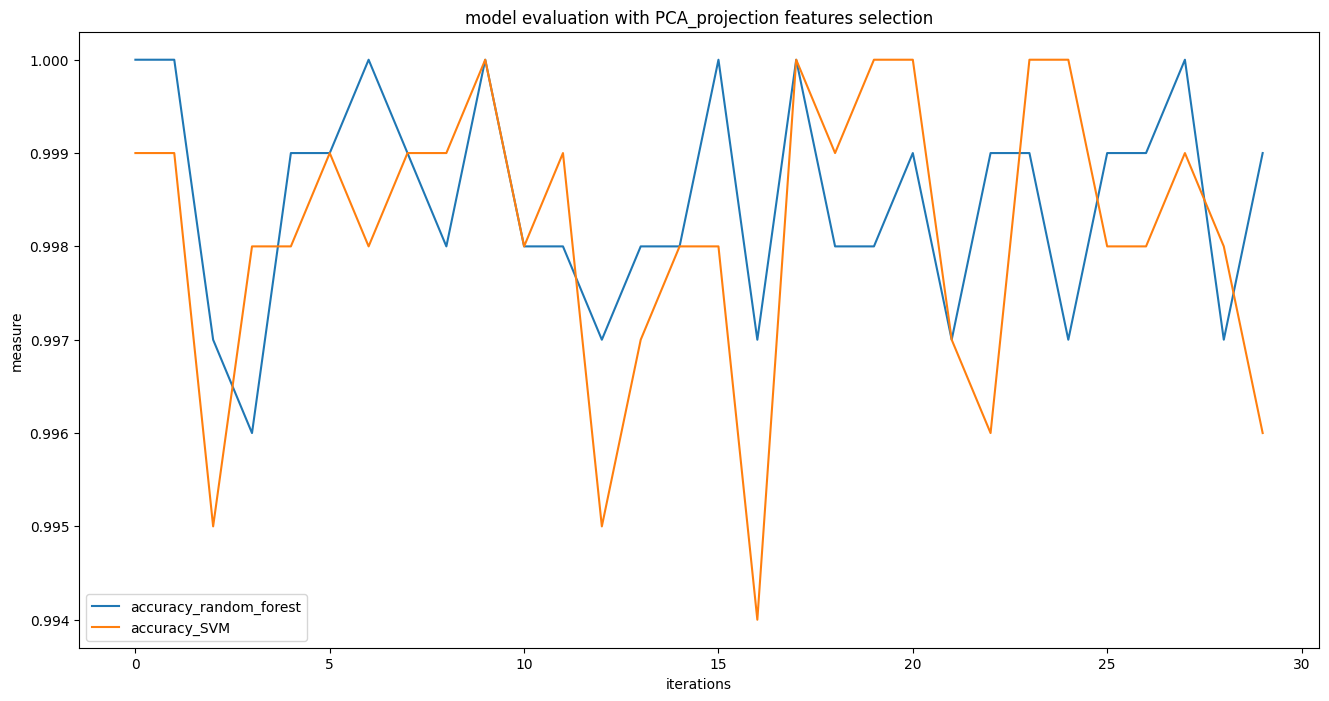

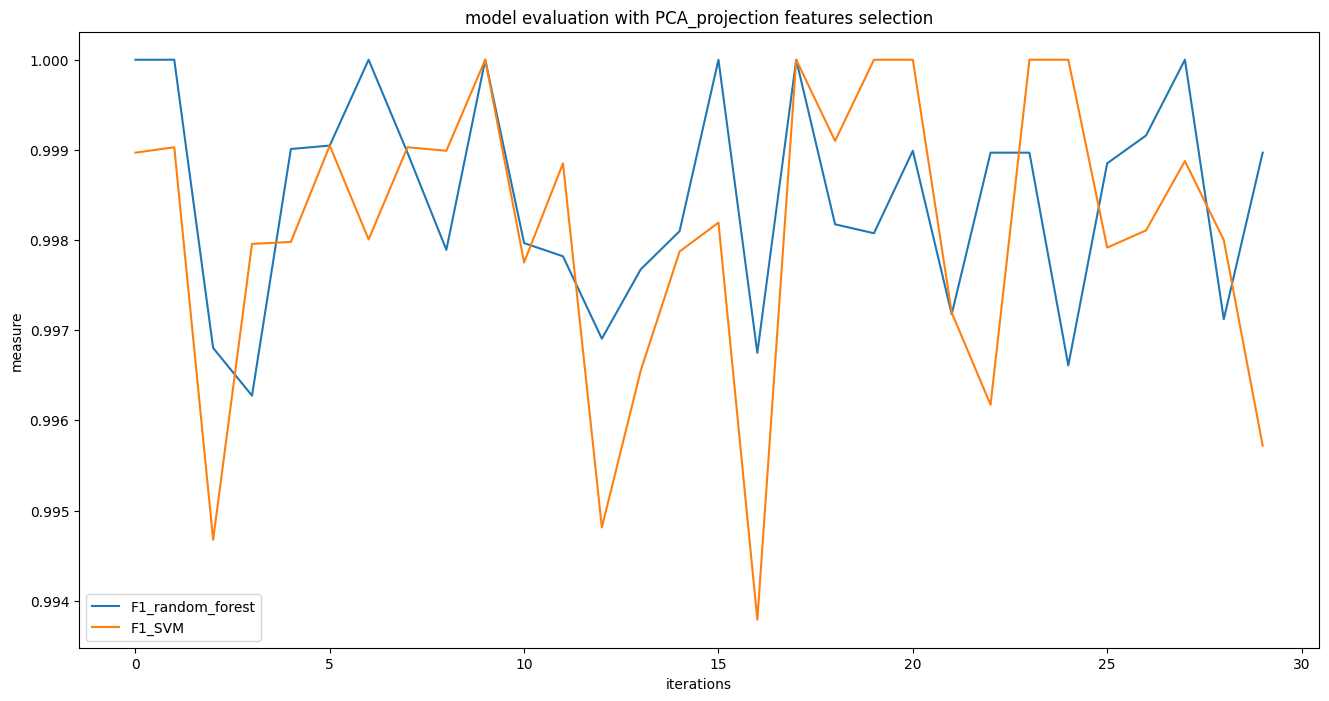

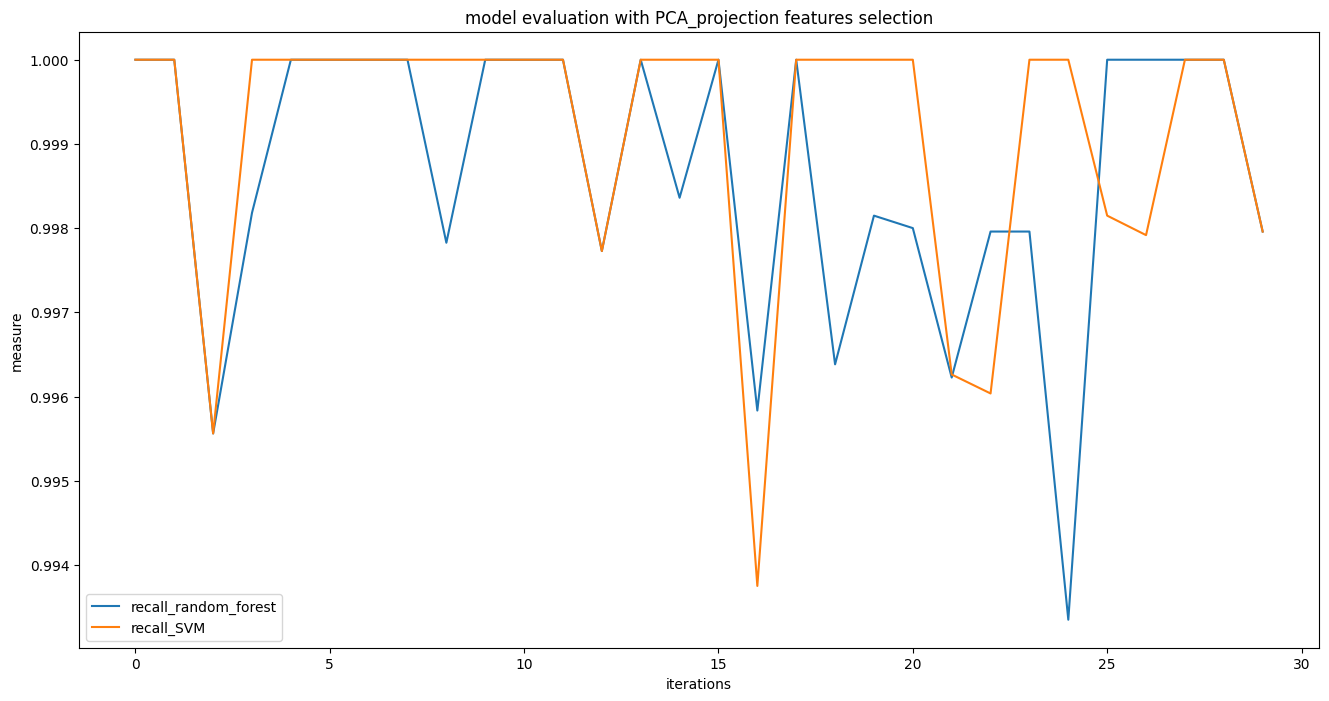

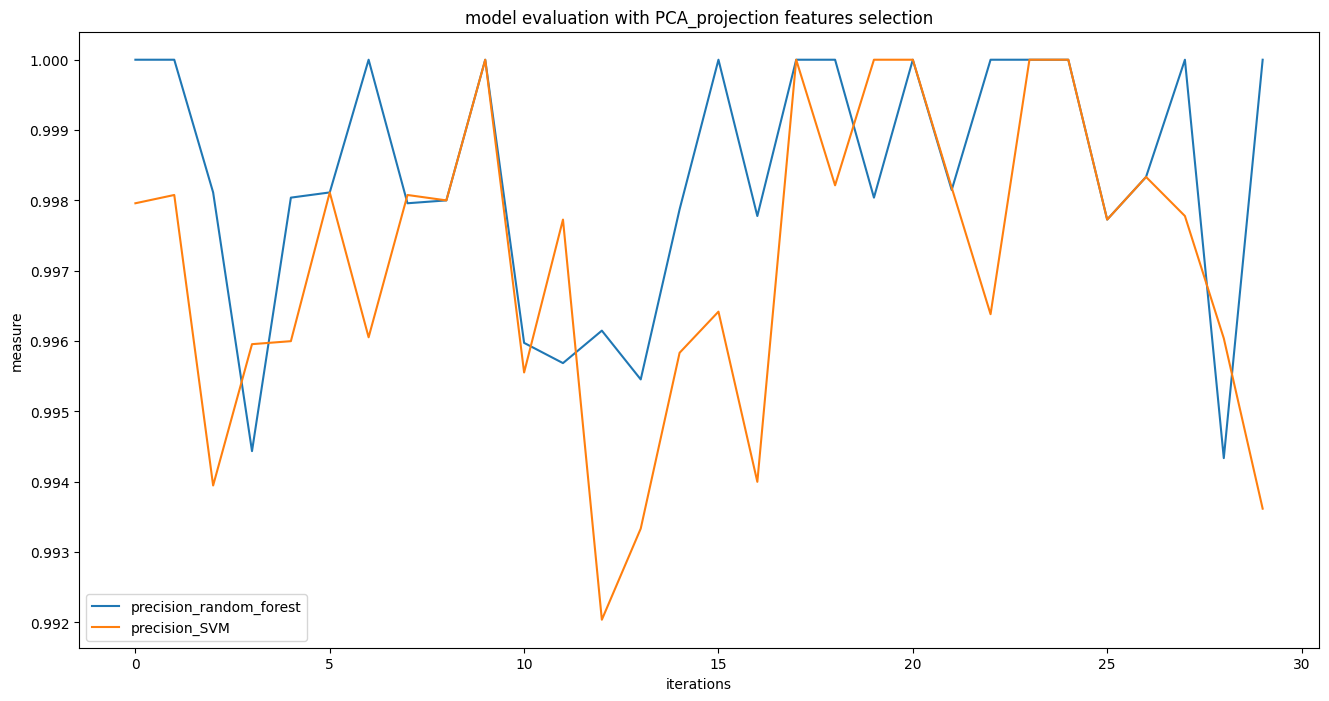

In [100]:
fs_methods=["all_features","relevant_features","ANOVA_filter","mutual_info_filter","SVM_wrapper","Logistic_wrapper","PCA_projection"]
for method in fs_methods:
    cross_validate_models(method,np.arange(8))

In [101]:
u.generate_frames("models")

generating all_features_metric_accuracy.png
generating all_features_metric_F1.png
generating all_features_metric_precision.png
generating all_features_metric_recall.png
generating ANOVA_filter_metric_accuracy.png
generating ANOVA_filter_metric_F1.png
generating ANOVA_filter_metric_precision.png
generating ANOVA_filter_metric_recall.png
generating Logistic_wrapper_metric_accuracy.png
generating Logistic_wrapper_metric_F1.png
generating Logistic_wrapper_metric_precision.png
generating Logistic_wrapper_metric_recall.png
generating mutual_info_filter_metric_accuracy.png
generating mutual_info_filter_metric_F1.png
generating mutual_info_filter_metric_precision.png
generating mutual_info_filter_metric_recall.png
generating PCA_projection_metric_accuracy.png
generating PCA_projection_metric_F1.png
generating PCA_projection_metric_precision.png
generating PCA_projection_metric_recall.png
generating relevant_features_metric_accuracy.png
generating relevant_features_metric_F1.png
generating rele